<h1>Visualize data using matplotlib and deaborn</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_house_prices = pd.read_csv('data/house-prices/train.csv')

<h1>Check null Values</h1>

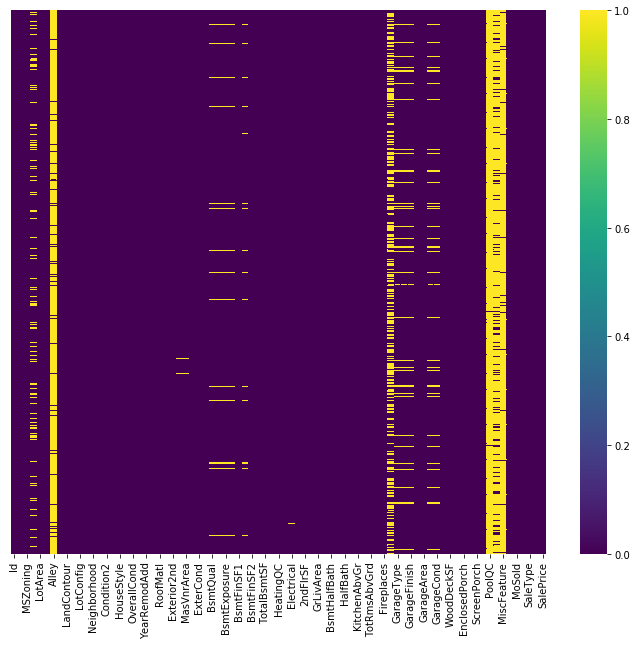

In [3]:
plt.figure(figsize=(12,10))
sns.heatmap(df_house_prices.isnull(),yticklabels=False,cbar=True,cmap='viridis')

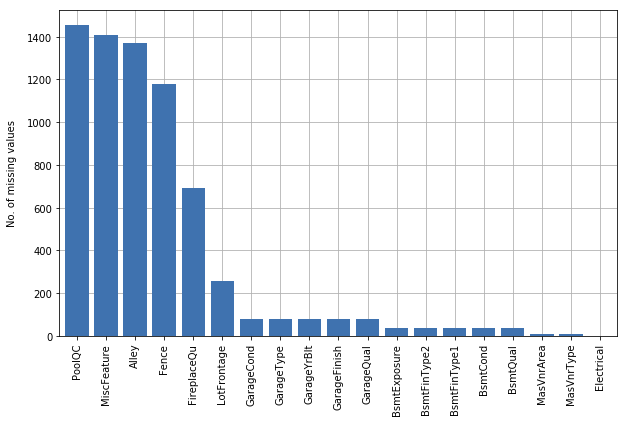

In [4]:
# plot missing values
nans = df_house_prices.isna().sum().sort_values(ascending=False)
nans = nans[nans > 0]
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.bar(nans.index, nans.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(nans) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [5]:
total = df_house_prices.isnull().sum().sort_values(ascending=False)
percent = (df_house_prices.isnull().sum()/df_house_prices.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


<h1>Checking correlation among variables</h1>

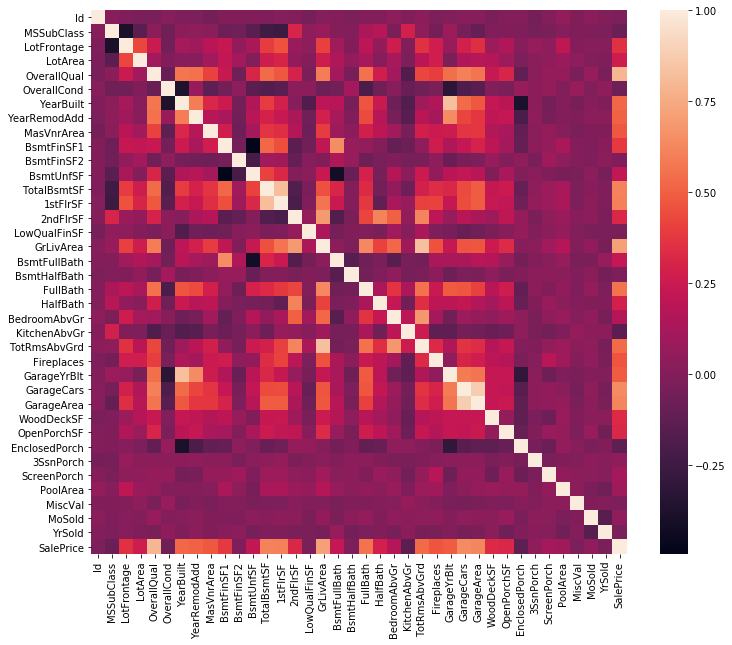

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df_house_prices.corr())

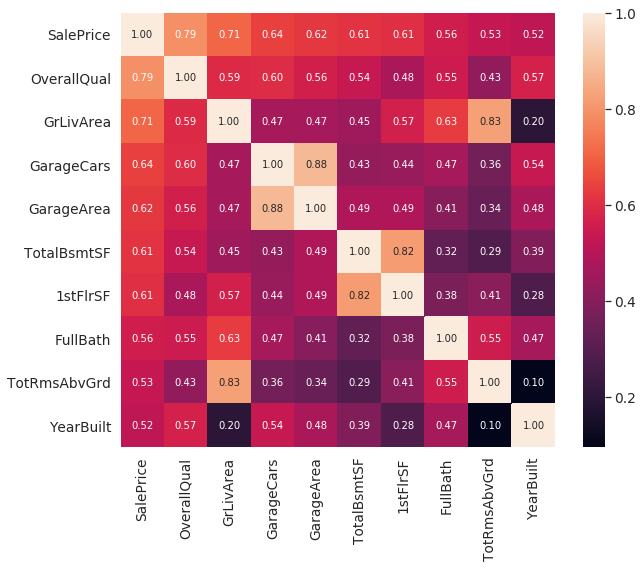

In [7]:
plt.figure(figsize=(10,8))
k = 10 #number of variables for heatmap
corrmat = df_house_prices.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_house_prices[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

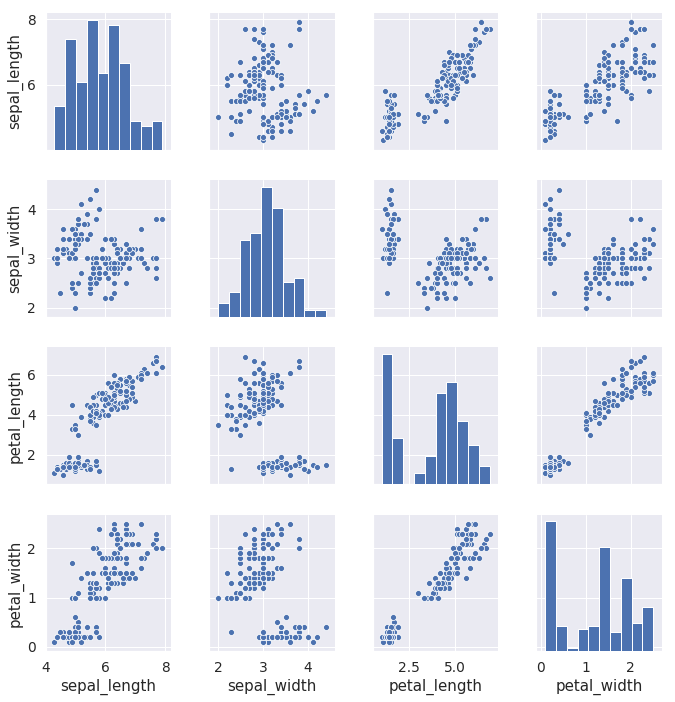

In [8]:
# sns.pairplot(df_house_prices, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
df = sns.load_dataset('iris')
sns.pairplot(df)

<h1>Checking data distribution (normal or skewed)</h1>

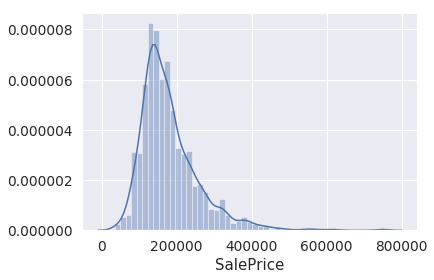

In [9]:
sns.distplot(df_house_prices['SalePrice']);

<h1>Checking value count of a class/feature</h1>

In [10]:
df_tweets = pd.read_csv('data/disaster-tweets/train.csv')

Text(0, 0.5, 'samples')

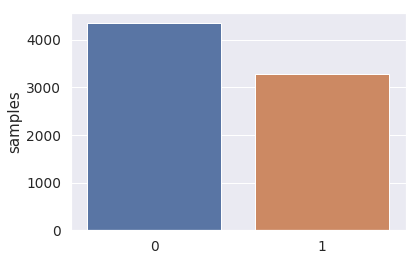

In [11]:
x=df_tweets.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

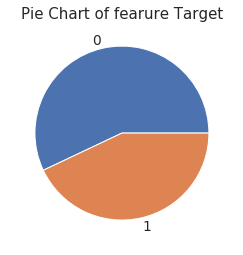

In [12]:
# plot pychart with pandas
df = df_tweets.groupby('target').size()
df.plot(kind='pie', subplots=True, figsize=(4, 4))
plt.title("Pie Chart of fearure Target")
plt.ylabel("")
plt.show()

<h1>Class frequency using histogram</h1>

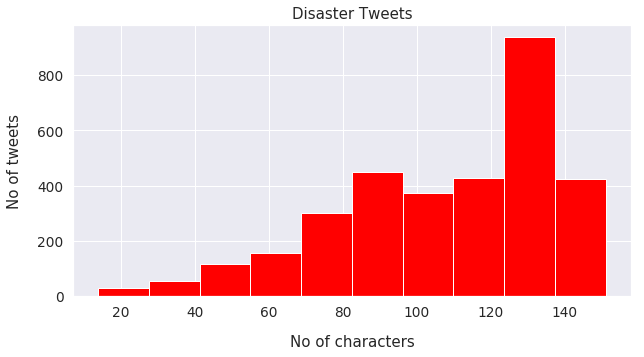

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
tweet_len=df_tweets[df_tweets['target']==1]['text'].str.len()
ax.hist(tweet_len,color='red')
ax.set_title('Disaster Tweets')
ax.set_xlabel("No of characters", labelpad=15)
ax.set_ylabel("No of tweets", labelpad=15)
plt.show()

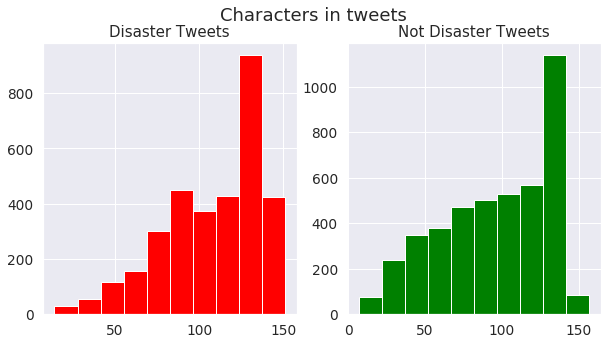

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df_tweets[df_tweets['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('Disaster Tweets')
tweet_len=df_tweets[df_tweets['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not Disaster Tweets')
fig.suptitle('Characters in tweets')
plt.show()